# House Price Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

C:\Users\Farzan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('HousePrice.csv')
df

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.06263,0.0,11.93,0,0.573,6.593,2.4786,1,273,21.0,9.67,22.4
486,0.04527,0.0,11.93,0,0.573,6.120,2.2875,1,273,21.0,9.08,20.6
487,0.06076,0.0,11.93,0,0.573,6.976,2.1675,1,273,21.0,5.64,23.9
488,0.10959,0.0,11.93,0,0.573,6.794,2.3889,1,273,21.0,6.48,22.0


In [3]:
df.corr()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,-0.382231,0.627434,0.583711,0.287079,0.461755,-0.450115
zn,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,0.673227,-0.307726,-0.302897,-0.381815,-0.422090,0.404608
indus,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,-0.710284,0.596124,0.717678,0.387656,0.636527,-0.600005
chas,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,-0.077705,-0.032786,-0.067743,-0.116830,-0.006486,0.074803
nox,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,-0.768122,0.612160,0.667380,0.188381,0.612444,-0.524451
rm,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,0.245789,-0.195768,-0.281955,-0.293299,-0.610369,0.686634
dis,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,1.000000,-0.491875,-0.532025,-0.246773,-0.536493,0.368813
rad,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,-0.491875,1.000000,0.909000,0.456035,0.510192,-0.476296
tax,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,-0.532025,0.909000,1.000000,0.452252,0.566467,-0.572442
ptratio,0.287079,-0.381815,0.387656,-0.116830,0.188381,-0.293299,-0.246773,0.456035,0.452252,1.000000,0.358023,-0.518641


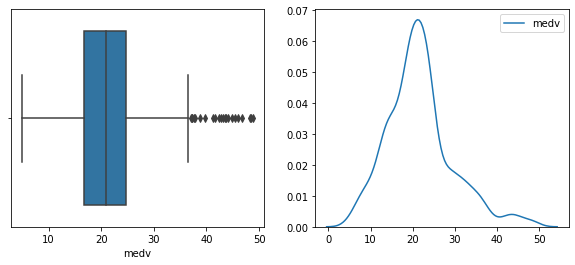

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df.medv)

plt.subplot(1,2,2)
sns.kdeplot(df.medv)

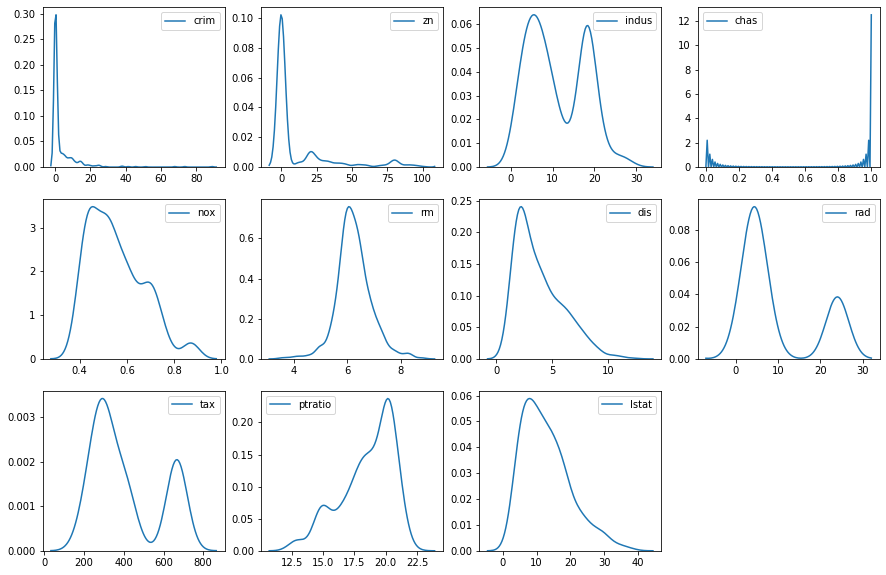

In [5]:
count = 1
plt.figure(figsize=(15,10))
for i in np.arange(0,len(df.columns)-1):
    plt.subplot(3,4,count)
    sns.kdeplot(df.iloc[:,i])
    count = count + 1

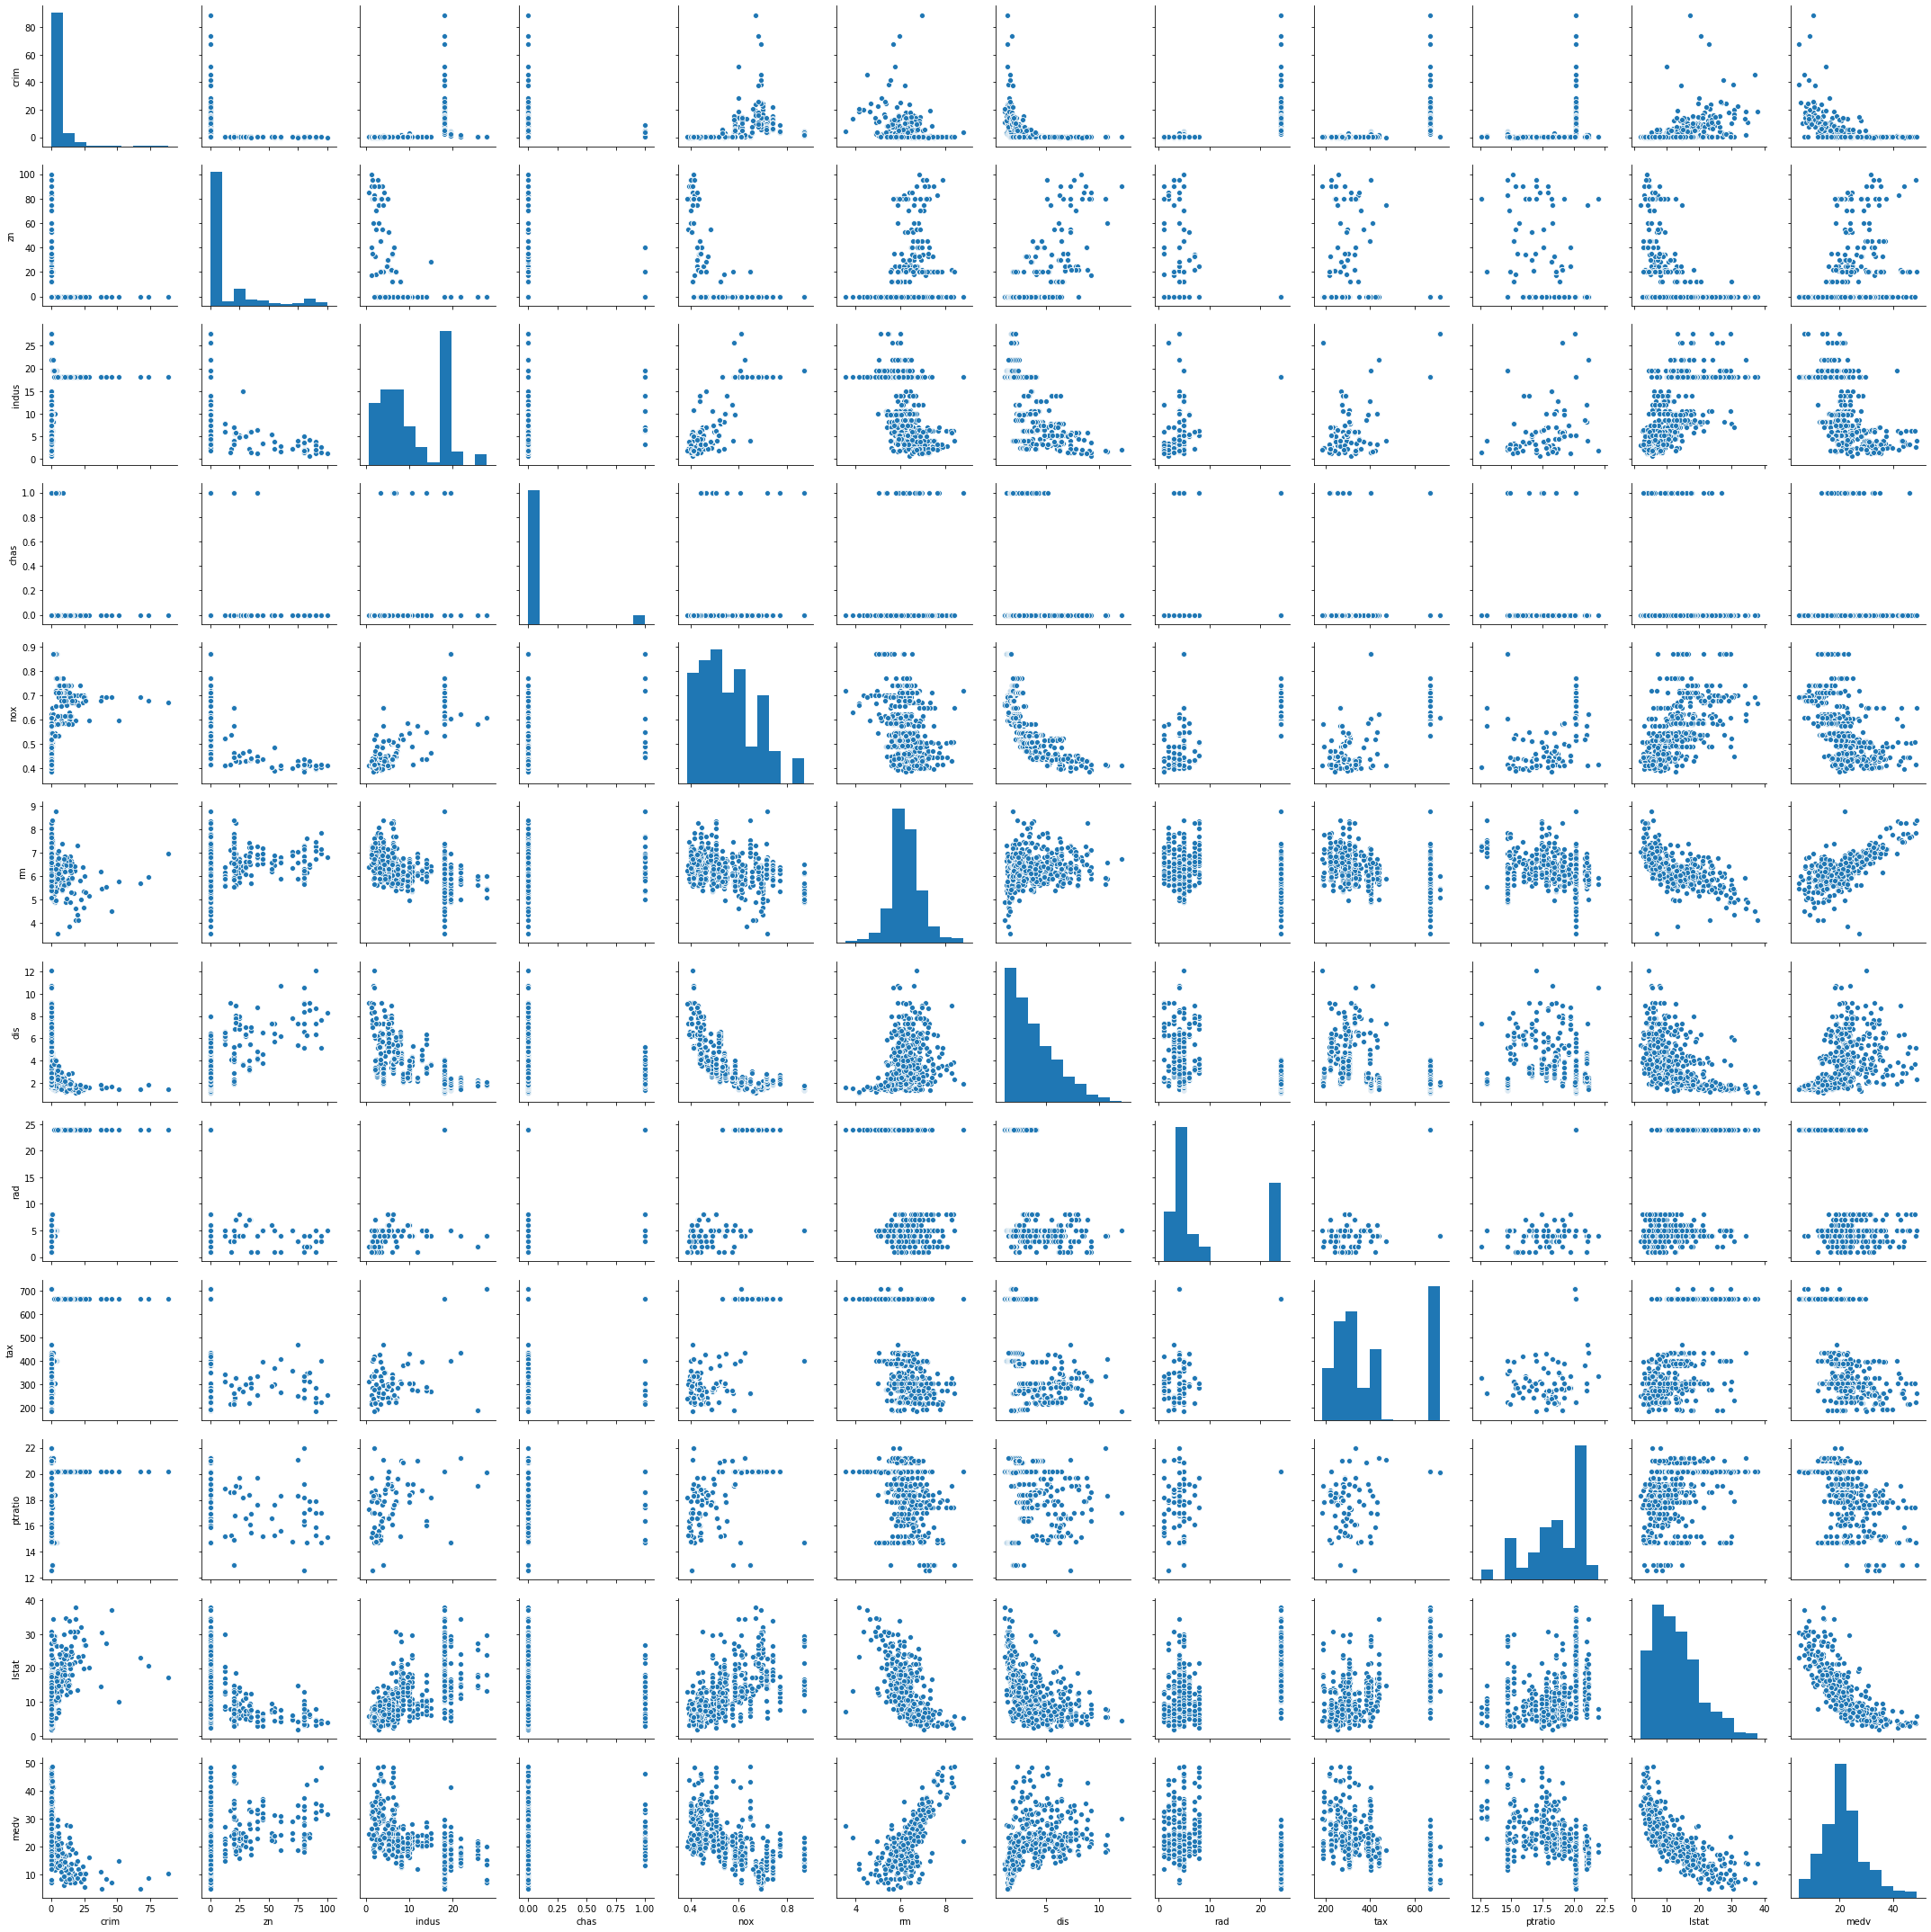

In [6]:
sns.pairplot(df)

In [7]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
X = df.drop('medv', axis = 1)
y = df.medv
X2 = sm.add_constant(X)
lm1 = sm.OLS(y,X2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.62e-144
Time:                        22:01:38   Log-Likelihood:                -1345.9
No. Observations:                 490   AIC:                             2716.
Df Residuals:                     478   BIC:                             2766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2868      3.999      9.325      0.0

In [9]:
#'crim', 'zn', 'indus', 'chas', 'nox', 'rm','dis', 'rad', 'tax', 'ptratio', 'lstat',
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm2 = smf.ols(formula = formula, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.75e-146
Time:                        22:01:38   Log-Likelihood:                -1346.6
No. Observations:                 490   AIC:                             2713.
Df Residuals:                     480   BIC:                             2755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6032      3.986      9.434      0.0

In [10]:
pred = lm2.predict(df)

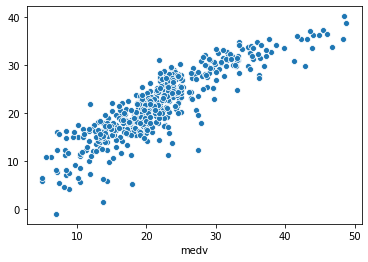

In [11]:
sns.scatterplot(df.medv, pred)

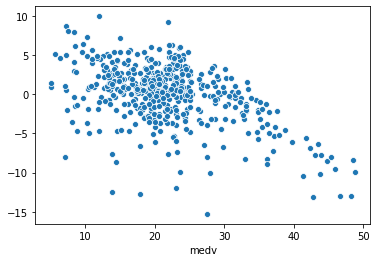

In [12]:
sns.scatterplot(df.medv, pred-df.medv)

### Scaled model

In [13]:
def scale(data):
    dataout = (data - data.min())/(data.max()-data.min())
    return dataout

In [14]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     490 non-null    float64
 1   zn       490 non-null    float64
 2   indus    490 non-null    float64
 3   chas     490 non-null    int64  
 4   nox      490 non-null    float64
 5   rm       490 non-null    float64
 6   dis      490 non-null    float64
 7   rad      490 non-null    int64  
 8   tax      490 non-null    int64  
 9   ptratio  490 non-null    float64
 10  lstat    490 non-null    float64
 11  medv     490 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 46.1 KB


In [16]:
for i in df.columns:
    df[i] = scale(df[i])

In [17]:
df.describe()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.040878,0.111122,0.384190,0.059184,0.348369,0.514365,0.245463,0.370186,0.421760,0.629787,0.304085,0.379815
std,0.098035,0.228446,0.252641,0.236209,0.240098,0.125148,0.191997,0.377882,0.320735,0.224519,0.196810,0.179573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.164815,0.000000,0.131687,0.444530,0.088635,0.130435,0.177958,0.510638,0.149139,0.267123
50%,0.002711,0.000000,0.331481,0.000000,0.314815,0.502778,0.194631,0.173913,0.272901,0.691489,0.269380,0.363014
75%,0.040925,0.125000,0.642963,0.000000,0.491770,0.578080,0.371045,1.000000,0.914122,0.808511,0.420603,0.449201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm3 = smf.ols(formula = formula, data = df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.75e-146
Time:                        22:01:39   Log-Likelihood:                 505.42
No. Observations:                 490   AIC:                            -990.8
Df Residuals:                     480   BIC:                            -948.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5380      0.037     14.619      0.0

In [19]:
lm3.params.abs().sort_values(ascending = False)

Intercept    0.538025
rm           0.419029
lstat        0.334317
dis          0.276054
crim         0.239221
tax          0.186540
ptratio      0.185143
nox          0.172322
rad          0.137338
zn           0.089308
dtype: float64

In [20]:
lm3.params.sort_values(ascending = False)

Intercept    0.538025
rm           0.419029
rad          0.137338
zn           0.089308
nox         -0.172322
ptratio     -0.185143
tax         -0.186540
crim        -0.239221
dis         -0.276054
lstat       -0.334317
dtype: float64

In [21]:
# The end!